In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\downloads\spotify_streams.csv')
df.head()

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,"3,783,983,806","1,736,378"
1,Ed Sheeran - Shape of You,"3,616,649,759","1,135,140"
2,Lewis Capaldi - Someone You Loved,"2,958,875,491","1,522,093"
3,Post Malone - Sunflower,"2,898,311,408","1,871,177"
4,Tones And I - Dance Monkey,"2,896,024,418","666,818"


In [17]:
split_data = df['Artist and Title'].str.split(' - ', expand=True)
df['Artist'] = split_data[0]
df['Title'] = split_data[1]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   int64 
 2   Daily             2500 non-null   int32 
 3   Artist            2500 non-null   object
 4   Title             2499 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 88.0+ KB


In [19]:
df.head()

,Artist and Title,Streams,Daily,Artist,Title
0,The Weeknd - Blinding Lights,3783983806,1736378,The Weeknd,Blinding Lights
1,Ed Sheeran - Shape of You,3616649759,1135140,Ed Sheeran,Shape of You
2,Lewis Capaldi - Someone You Loved,2958875491,1522093,Lewis Capaldi,Someone You Loved
3,Post Malone - Sunflower,2898311408,1871177,Post Malone,Sunflower
4,Tones And I - Dance Monkey,2896024418,666818,Tones And I,Dance Monkey


In [4]:
df['Daily'] = df['Daily'].str.replace(',', '').fillna(0).astype(int)

In [5]:
df['Streams'] = df['Streams'].str.replace(',', '').fillna(0).astype(np.int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   int64 
 2   Daily             2500 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 49.0+ KB


In [7]:
unique_counts = df.nunique()
unique_values = {col: df[col].unique() for col in df.columns}

In [8]:
print("Number of unique values in each column:")
print(unique_counts)
print("\nUnique values in each column:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

Number of unique values in each column:
Artist and Title    2479
Streams             2496
Daily               2489
dtype: int64

Unique values in each column:
Artist and Title: ['The Weeknd - Blinding Lights' 'Ed Sheeran - Shape of You'
 'Lewis Capaldi - Someone You Loved' ... 'Clairo - Bubble Gum'
 'Bing Crosby - White Christmas' 'Shaggy - Angel']
Streams: [3783983806 3616649759 2958875491 ...  398936748  398725594  398310263]
Daily: [1736378 1135140 1522093 ...  370661 1250615  339498]


In [9]:
value_counts = df['Streams'].value_counts()
print("\nValue counts for a specific column:")
print(value_counts)


Value counts for a specific column:
888252309    2
565006500    2
461973056    2
634230804    2
519200111    1
            ..
756227002    1
756058581    1
755895686    1
755720851    1
398310263    1
Name: Streams, Length: 2496, dtype: int64


In [10]:
df.describe()

,Streams,Daily
count,2.500000e+03,2.500000e+03
mean,7.569890e+08,4.458339e+05
std,4.007388e+08,4.027769e+05
min,3.983103e+08,0.000000e+00
25%,4.847359e+08,2.185258e+05
50%,6.167420e+08,3.395390e+05
75%,8.882523e+08,5.589335e+05
max,3.783984e+09,9.215515e+06


In [11]:
top_5 = df.sort_values(by='Streams', ascending=False).head(5)

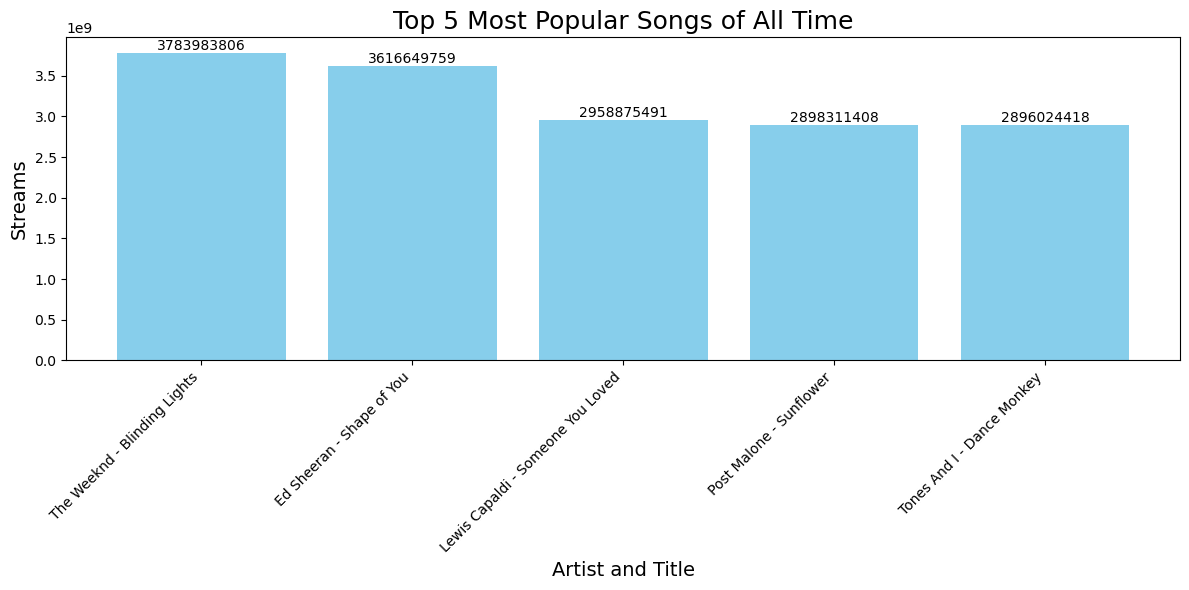

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(top_5['Artist and Title'], top_5['Streams'], color='skyblue')
plt.xlabel('Artist and Title', fontsize = 14)
plt.ylabel('Streams', fontsize = 14)
plt.title('Top 5 Most Popular Songs of All Time', fontsize = 18)
plt.xticks(rotation=45, ha='right')
bars = plt.bar(top_5['Artist and Title'], top_5['Streams'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.0f}',         
                 (bar.get_x() + bar.get_width() / 2, yval), 
                 ha='center',            
                 va='bottom',           
                 fontsize=10)
plt.tight_layout()
plt.show()

In [20]:
top_artists_streams = df.groupby('Artist')['Streams'].sum().sort_values(ascending=False).head(10)
print(top_artists_streams)

Artist
Drake            29633804177
The Weeknd       28939761191
Ed Sheeran       28774547398
Bad Bunny        28665586274
Taylor Swift     26186296710
Post Malone      24604040715
Billie Eilish    22831647986
Ariana Grande    20655534759
Eminem           19013189172
Maroon 5         17324160771
Name: Streams, dtype: int64


In [21]:
top_artists_daily = df.groupby('Artist')['Daily'].sum().sort_values(ascending=False).head(10)
print(top_artists_daily)

Artist
Taylor Swift       39341219
The Weeknd         22689604
Bad Bunny          18883263
Drake              15947201
Bruno Mars         12393179
Eminem             11252393
Kanye West         11086791
Billie Eilish      10833630
Post Malone        10699362
Imagine Dragons    10341689
Name: Daily, dtype: int32


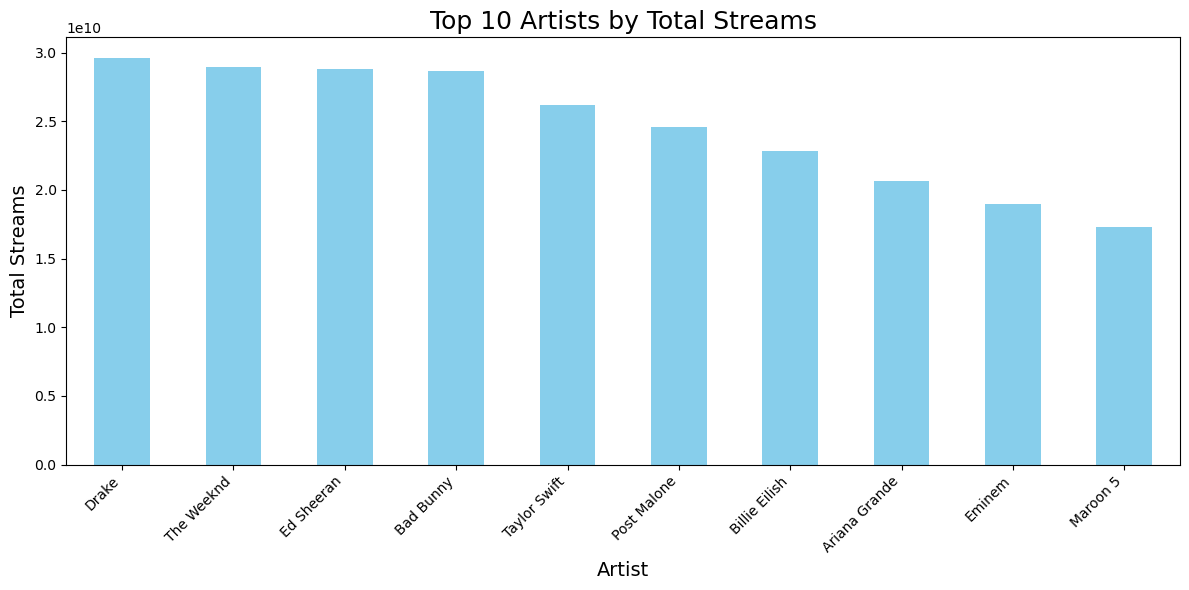

In [25]:
plt.figure(figsize=(12, 6))
top_artists_streams.plot(kind='bar', color='skyblue')
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Total Streams', fontsize=14)
plt.title('Top 10 Artists by Total Streams', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

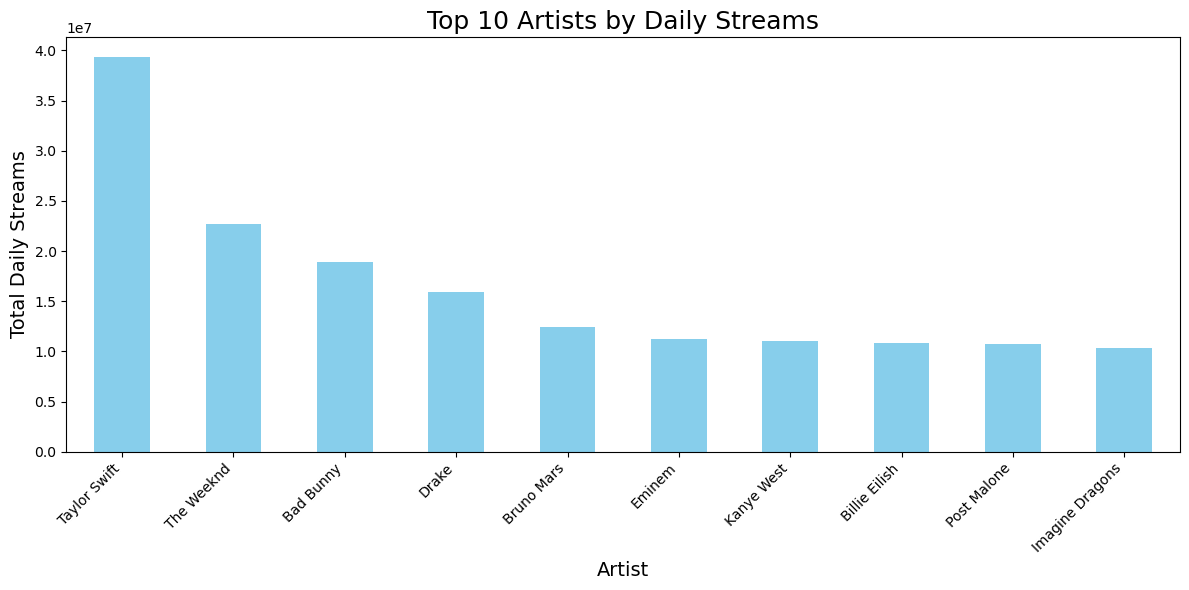

In [28]:
plt.figure(figsize=(12, 6))
top_artists_daily.plot(kind='bar', color='skyblue')
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Total Daily Streams', fontsize=14)
plt.title('Top 10 Artists by Daily Streams', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
artists_song_count = df['Artist'].value_counts()

In [30]:
top_artists_most_songs = artists_song_count.head(10)
top_artists_most_songs

Taylor Swift     38
Bad Bunny        37
Drake            36
Billie Eilish    27
The Weeknd       25
Ed Sheeran       24
Post Malone      21
Ariana Grande    21
Kanye West       20
Eminem           19
Name: Artist, dtype: int64

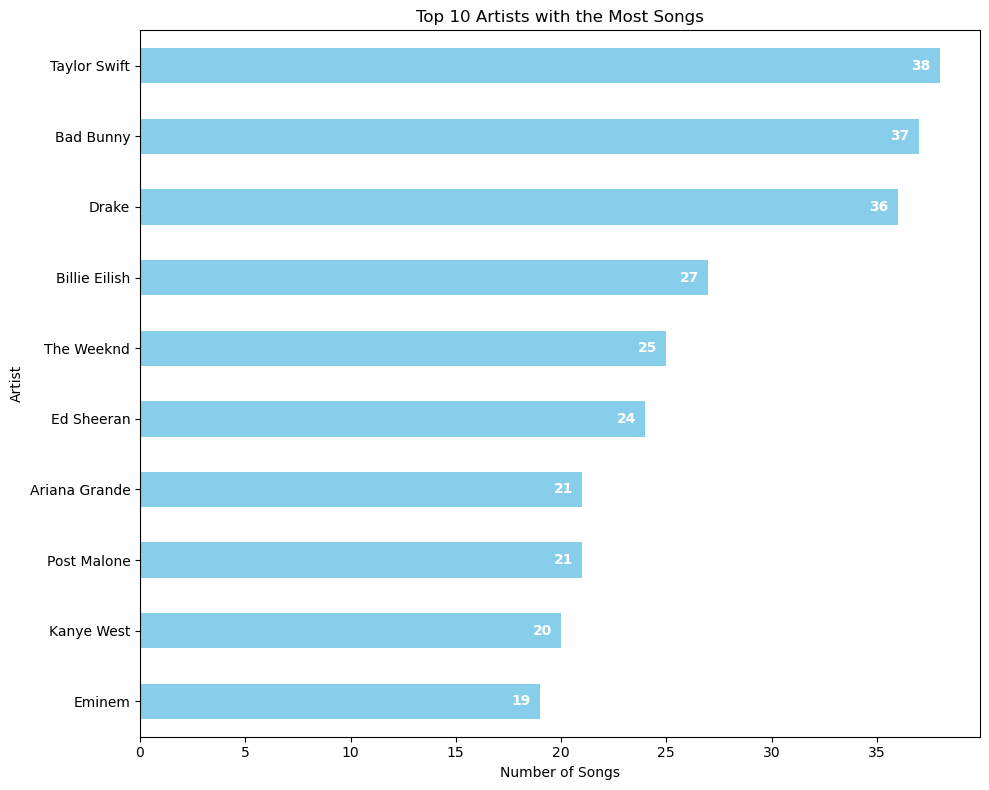

In [35]:
plt.figure(figsize=(10, 8))
artists_song_count_head = artists_song_count.head(10).sort_values()
bars = artists_song_count_head.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.title('Top 10 Artists with the Most Songs')
for bar in bars.patches:
    plt.text(bar.get_width() - 0.9,  
             bar.get_y() + bar.get_height()/2,  
             int(bar.get_width()),  
             ha='center', va='center', 
             color='white', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()